In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
from PIL import Image
import array as arr
from sklearn.preprocessing import MinMaxScaler
import skimage.feature
from skimage.feature import greycomatrix
from skimage.filters import rank, try_all_threshold
from skimage.morphology import disk

# Read Patient Dataset

In [2]:
HomeLi = [pd.read_csv("HrData1.csv"),
          pd.read_csv("HrData2.csv"),
          pd.read_csv("HrData3.csv"),
          pd.read_csv("HrData4.csv"),
          pd.read_csv("HrData5.csv"),
          pd.read_csv("HrData6.csv"),
          pd.read_csv("HrData7.csv")]

for i in range(len(HomeLi)):
    HomeLi[i].drop(['total','Unnamed: 0'],axis=1,inplace=True)

# Remove errors and missing data

In [3]:
err = pd.DataFrame({'patient': [], 'column': [], 'row': []})

for i in range(len(HomeLi)):
    for j in range(1,12):
        for k in range(len(HomeLi[i])):
            if ((HomeLi[i].iloc[k,j])<0) or ((HomeLi[i].iloc[k,j])==None):
                err.loc[len(err.index)] = [i, j, k]

# Create Unusual hour directory for heatmaps

In [ ]:
for i in range(0,len(HomeLi)):
    os.mkdir("UnusualHours"+str(i))

# Seasonal Min-max Normalisation

In [5]:
#Change i from 0 to 6 for patient datasets


summer = []
autumn = []
winter = []
spring = []

for i in range(0,1):
    for j in range(0,len(HomeLi[i]),24):
        month = HomeLi[i].iloc[j,0]
        if month[5:7] == '08' or month[5:7] == '06' or month[5:7] == '07':
            summer.append(HomeLi[i][j:j+24])
        if month[5:7] == '09' or month[5:7] == '10' or month[5:7] == '11':
            autumn.append(HomeLi[i][j:j+24])
        if month[5:7] == '12' or month[5:7] == '01' or month[5:7] == '02':
            winter.append(HomeLi[i][j:j+24])
        if month[5:7] == '03' or month[5:7] == '04' or month[5:7] == '05':
            spring.append(HomeLi[i][j:j+24])
            
            
CSummer = pd.DataFrame()
for s in range(0,len(summer)):
    CSummer = CSummer.append(summer[s], ignore_index=True)
CAutumn = pd.DataFrame()
for s in range(0,len(autumn)):
    CAutumn = CAutumn.append(autumn[s], ignore_index=True)
Cwinter = pd.DataFrame()
for s in range(0,len(winter)):
    Cwinter = Cwinter.append(winter[s], ignore_index=True)
Cspring = pd.DataFrame()
for s in range(0,len(spring)):
    Cspring = Cspring.append(spring[s], ignore_index=True)
    

TimeSummer = CSummer.iloc[:,0:2]
TimeAutumn = CAutumn.iloc[:,0:2]
TimeSpring = Cspring.iloc[:,0:2]
TimeWinter = Cwinter.iloc[:,0:2]


CSummer.drop(['date','hour'],axis=1,inplace=True)
CAutumn.drop(['date','hour'],axis=1,inplace=True)
Cwinter.drop(['date','hour'],axis=1,inplace=True)
Cspring.drop(['date','hour'],axis=1,inplace=True)


Smin_value, Smax_value = CSummer.min().min(), CSummer.max().max()
Summerscaled1 = (CSummer - Smin_value) * 1 / (Smax_value - Smin_value)

Amin_value, Amax_value = CAutumn.min().min(), CAutumn.max().max()
Autumnscaled1 = (CAutumn - Amin_value) * 1 / (Amax_value - Amin_value)

Wmin_value, Wmax_value = Cwinter.min().min(), Cwinter.max().max()
Winterscaled1 = (Cwinter - Wmin_value) * 1 / (Wmax_value - Wmin_value)

Spmin_value, Spmax_value = Cspring.min().min(), Cspring.max().max()
Springscaled1 = (Cspring - Spmin_value) * 1 / (Spmax_value - Spmin_value)


summerNew = pd.concat([TimeSummer, Summerscaled1], axis=1)
autumnNew = pd.concat([TimeAutumn, Autumnscaled1], axis=1)
winterNew = pd.concat([TimeWinter, Winterscaled1], axis=1)
springNew = pd.concat([TimeSpring, Springscaled1], axis=1)


Patient = pd.DataFrame()
Patient = Patient.append(summerNew, ignore_index=True)
Patient = Patient.append(autumnNew, ignore_index=True)
Patient = Patient.append(winterNew, ignore_index=True)
Patient = Patient.append(springNew, ignore_index=True)

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\2437426811.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CSummer = CSummer.append(summer[s], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\2437426811.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAutumn = CAutumn.append(autumn[s], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\2437426811.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cwinter = Cwinter.append(winter[s], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\2437426811.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

# Generate heatmaps

In [ ]:
#if the heatmaps are already generated, don't run this part.

for i in range(0,1):
    for j in range(0,len(Patient),24):
        df = pd.DataFrame(Patient[j:j+6])
        df = df.append(Patient[j+22:j+24], ignore_index=True)

        df = pd.pivot_table(df,index = 'hour')
        mms = MinMaxScaler()
        df_norm = mms.fit_transform(df)
        
        normalised_hmap = sb.heatmap(df_norm, linewidths=.5, cmap='viridis', cbar=False, xticklabels=['backdoor', 'bathroom', 'lounge', 'frontdoor', 'bedroom', 'kettle', 'hallway',  'kitchen', 'fridgedoor', 'backdoor', 'oven'])
        
        fig = normalised_hmap.get_figure()
        fig.savefig("UnusualHours0/hour"+str(j)+".png",bbox_inches ="tight")

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(Patient[j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_5568\3217977973.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Texture analysis using GLCM, Histogram & GLRLM

In [4]:
count = 0
dli = []

for i in range(0,1):
    for j in range(0,len(Patient),24):
        df = pd.DataFrame(Patient[j:j+6])
        df = df.append(Patient[j+22:j+24], ignore_index=True)

        df = pd.pivot_table(df,index = 'hour')
        mms = MinMaxScaler()
        df_norm = mms.fit_transform(df)
        
        df_new = df_norm*100
        df_new = df_new.astype(np.int8)
        
        result = skimage.feature.graycomatrix(df_new, [1], [np.pi/2])
        contrast = np.round(skimage.feature.graycoprops(result, 'contrast'),5)
        dissimilarity = np.round(skimage.feature.graycoprops(result, 'dissimilarity'),5)
        homogeneity = np.round(skimage.feature.graycoprops(result, 'homogeneity'),5)
        asm = np.round(skimage.feature.graycoprops(result, 'ASM'),5)
        energy = np.round(skimage.feature.graycoprops(result, 'energy'),5)
        entropy = np.round(skimage.measure.shannon_entropy(result),5)
        
        
        app = GLRLM()
        glrlm = app.get_features(df_new, 8)
        SRE = glrlm.SRE
        LRE = glrlm.LRE
        GLU = glrlm.GLU
        RLU = glrlm.RLU
        RPC = glrlm.RPC
        
        mean = np.mean(df_new)
        var = np.var(df_new)
        maxm = np.max(df_new)
        minm = np.min(df_new)
    
    
        count +=1
        dli.append([float(contrast), float(dissimilarity), float(homogeneity), 
                    float(asm), float(energy), float(entropy), SRE, LRE, GLU, RLU, RPC, 
                    mean, var, maxm, minm])

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(HomeLi[i][j+22:j+24], ignore_index=True)
C:\Users\Anisha Jubitha\AppData\Local\Temp\ipykernel_36004\4074832155.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [5]:
Texturedata = pd.DataFrame(dli, columns= ['Contrast', 'Dissimilarity', 'Homogeneity', 'ASM', 'Energy', 'Enrtopy', 'SRE',
                                             'LRE', 'GLU', 'RLU', 'RPC', 'Mean', 'Variance', 'Maximum', 'Minimum'])
Texturedata

,Contrast,Dissimilarity,Homogeneity,ASM,Energy,Enrtopy,SRE,LRE,GLU,RLU,RPC,Mean,Variance,Maximum,Minimum
0,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
1,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
2,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
3,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
4,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
377,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
378,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0
379,0.0,0.0,1.0,1.0,1.0,0.00027,0.388,219.53,131.919,22.352,0.649,0.0,0.0,0,0


# Mean-shift clustering algorithm

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.70000000e-04]
 [6.71789901e+02 6.83891914e+00 9.29070172e-01 8.59869138e-01
  9.27050862e-01 8.53448276e-04]
 [1.00045788e+03 1.01007324e+01 8.97081154e-01 8.02040897e-01
  8.95323718e-01 8.74487179e-04]
 [2.99603179e+02 3.01587028e+00 9.69446667e-01 9.39669722e-01
  9.69319444e-01 7.70277778e-04]
 [1.47029752e+03 1.49273270e+01 8.45983478e-01 7.18084783e-01
  8.46989565e-01 9.44782609e-04]
 [1.76154000e+03 1.80714300e+01 8.10026000e-01 6.58735000e-01
  8.11330000e-01 1.06500000e-03]
 [2.08333333e+03 2.09523800e+01 7.88118333e-01 6.20885000e-01
  7.87943333e-01 1.04166667e-03]
 [3.14285714e+03 3.14285700e+01 6.85750000e-01 5.20000000e-01
  7.21110000e-01 8.00000000e-04]
 [2.85714286e+03 2.85714300e+01 7.14310000e-01 5.51430000e-01
  7.42580000e-01 8.00000000e-04]]
Estimated clusters: 9


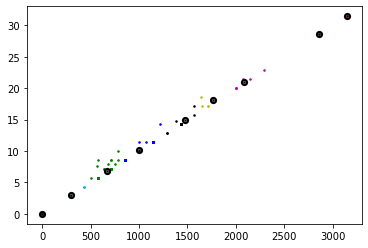

In [25]:
ms = MeanShift()
st = ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

In [30]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 2, 4, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 3, 1, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 2, 3, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 4, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 4, 1, 0, 4, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 2, 2,
       5, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 6, 2, 1, 2, 6, 1, 1, 1, 2, 2, 5,
       1, 4, 2, 6, 1, 1, 1, 2, 2, 1, 3, 2, 4, 2, 2, 2, 1, 7, 2, 8, 2, 2,
       2, 2, 2, 6, 1, 6, 1, 4, 1, 2, 1, 1, 6, 0, 3, 5, 0, 4, 4, 4, 4, 1,
       0, 0, 4, 3, 2, 0, 3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 2,
       5, 0, 3, 5, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0,
       0, 0, 4, 0, 1, 4, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 4, 1, 1, 0, 0, 0, 2, 0, 2,

### Cluster count

In [ ]:
count = 0
highcount = 0
for i in range(len(ms.labels_)):
    if labels[i] == 0:
        count +=1
    if labels[i] > 0:
        highcount +=1
        
count, highcount